<a href="https://colab.research.google.com/github/WilkinsKimori/UEL-CN-7000-46613/blob/main/Real_Code_Running.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import pandas as pd

# Read the data into a Pandas DataFrame
df = pd.read_csv('/content/drive/MyDrive/Busara Mental Health/train.csv')

# Get the number of records
n_records = df.shape[0]

# Get the number of people with depression
n_depressed = df['depressed'].value_counts()[1]

# Print the number of records, number of people with depression, and percentage of people with depression
print("Total number of records: {}".format(n_records))
print("Total number of people depressed: {}".format(n_depressed))
print("Percentage of people with depression: {:.2f}%".format(100*n_depressed/n_records))


Total number of records: 1143
Total number of people depressed: 193
Percentage of people with depression: 16.89%


In [3]:
import pandas as pd

# Read the train data into a Pandas DataFrame
train_df_full = pd.read_csv('/content/drive/MyDrive/Busara Mental Health/train.csv')

# Check for missing values
print(train_df_full.isnull().sum())  # This will print the number of missing values for each column


surveyid              0
village               0
femaleres             0
age                   0
married               0
                     ..
saved_mpesa           0
amount_saved_mpesa    0
early_survey          0
depressed             0
day_of_week           0
Length: 74, dtype: int64


In [4]:
import pandas as pd

# Read the train data into a Pandas DataFrame
train_df_full = pd.read_csv('/content/drive/MyDrive/Busara Mental Health/train.csv')

# Check for missing values
print(train_df_full.isnull().sum())  # This will print the number of missing values for each column

# Fill in the missing values with the most frequent value
train_df_full= train_df_full.fillna(train_df_full.mode().iloc[0])

# Check for missing values again
print(train_df_full.isnull().sum())  # This should now print 0 for all columns


surveyid              0
village               0
femaleres             0
age                   0
married               0
                     ..
saved_mpesa           0
amount_saved_mpesa    0
early_survey          0
depressed             0
day_of_week           0
Length: 74, dtype: int64
surveyid              0
village               0
femaleres             0
age                   0
married               0
                     ..
saved_mpesa           0
amount_saved_mpesa    0
early_survey          0
depressed             0
day_of_week           0
Length: 74, dtype: int64


In [5]:
import pandas as pd

# Read the train data into a Pandas DataFrame
train_df_full = pd.read_csv('/content/drive/MyDrive/Busara Mental Health/train.csv')

# Get the list of columns to keep
important_columns = ['cons_social', 'durable_investment', 'hhsize', 'children', 'married', 'amount_saved_mpesa', 'age', 'cons_alcohol', 'village', 'surveyid']

# Keep only the important columns
train_df = train_df_full[important_columns]


# Normalize the data
for column in train_df.columns:
  train_df.loc[:, column] = pd.to_numeric(train_df[column])


# Drop any duplicate rows based on the surveyid column
train_df = train_df.drop_duplicates(subset='surveyid')

# Check the normalized data
print(train_df.head())

print("\n\n\n")  # Add a space

# Check for duplicate rows
print(train_df.duplicated().sum())  # This should now print 0


   cons_social  durable_investment  hhsize  children  married  \
0     0.000000             0.00000       6         4        1   
1     0.000000             0.00000       5         3        1   
2     0.000000             0.00000       5         3        1   
3    39.771500           778.11230       4         2        1   
4     8.087762           201.00562       6         4        0   

   amount_saved_mpesa   age  cons_alcohol  village  surveyid  
0            0.000000  28.0           0.0       91       926  
1            0.000000  23.0           0.0       57       747  
2            0.000000  22.0           0.0      115      1190  
3            1.249199  27.0           0.0       97      1065  
4            0.000000  59.0           0.0       42       806  




0


<ipython-input-5-d3343dd07dd3>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.loc[:, column] = pd.to_numeric(train_df[column])


In [6]:
import pandas as pd

# Get the list of columns to keep
important_columns = ['cons_social', 'durable_investment', 'hhsize', 'children', 'married', 'amount_saved_mpesa', 'age', 'cons_alcohol', 'village', 'surveyid']

# Read the train CSV into a Pandas DataFrame
df_train = pd.read_csv('/content/drive/MyDrive/Busara Mental Health/train.csv', usecols=important_columns)


# Read the test data into a Pandas DataFrame
df_test = pd.read_csv('/content/drive/MyDrive/Busara Mental Health/test.csv', usecols=important_columns)

# Print the first few rows of the train DataFrame
print(df_train.head())

print("\n\n\n")  # Add a space

# Print the first few rows of the test DataFrame
print(df_test.head())




   surveyid  village   age  married  children  hhsize  cons_alcohol  \
0       926       91  28.0        1         4       6           0.0   
1       747       57  23.0        1         3       5           0.0   
2      1190      115  22.0        1         3       5           0.0   
3      1065       97  27.0        1         2       4           0.0   
4       806       42  59.0        0         4       6           0.0   

   cons_social  durable_investment  amount_saved_mpesa  
0     0.000000             0.00000            0.000000  
1     0.000000             0.00000            0.000000  
2     0.000000             0.00000            0.000000  
3    39.771500           778.11230            1.249199  
4     8.087762           201.00562            0.000000  




   surveyid  village age  married  children  hhsize  cons_alcohol  \
0       901      181  21        0         3       4           0.0   
1       498       47  44        1         6       8           NaN   
2       710        8

In [7]:
import plotly.express as px
import pandas as pd

# Get the list of columns to keep
important_columns = ['cons_social', 'durable_investment', 'hhsize', 'children', 'married', 'amount_saved_mpesa', 'age', 'cons_alcohol', 'village', 'surveyid', 'depressed']

# Read the train CSV into a Pandas DataFrame
df_train = pd.read_csv('/content/drive/MyDrive/Busara Mental Health/train.csv', usecols=important_columns)

# Create a scatter plot of depressed vs cons_social
fig1 = px.scatter(
    df_train,
    x="cons_social",
    y="depressed",
    title="Scatter Plot of Cons_Social vs Depression"
)
# Create a histogram of depressed vs cons_social
fig = px.histogram(
    df_train,
    x="cons_social",
    y="depressed",
    title="Histogram of Cons_Social vs Depression"
)


fig1.show()
fig.show()




In [8]:
import plotly.express as px
import pandas as pd

# Get the list of columns to keep
important_columns = ['cons_social', 'durable_investment', 'hhsize', 'children', 'married', 'amount_saved_mpesa', 'age', 'cons_alcohol', 'village', 'surveyid', 'depressed']

# Read the train CSV into a Pandas DataFrame
df_train = pd.read_csv('/content/drive/MyDrive/Busara Mental Health/train.csv', usecols=important_columns)

# Create a scatter plot of household size vs depressed
fig1 = px.scatter(
     df_train,
    x="durable_investment",
    y="depressed",
    title="Scatter Plot of Household Size vs Depression"
)
# Create a histogram of household size vs depressed
fig = px.histogram(
    df_train,
    x="durable_investment",
    y="depressed",
    title="Histogram of Household Size vs Depression"
)

fig1.show()
fig.show()


In [9]:
import plotly.express as px
import pandas as pd

# Get the list of columns to keep
important_columns = ['cons_social', 'durable_investment', 'hhsize', 'children', 'married', 'amount_saved_mpesa', 'age', 'cons_alcohol', 'village', 'surveyid', 'depressed']

# Read the train CSV into a Pandas DataFrame
df_train = pd.read_csv('/content/drive/MyDrive/Busara Mental Health/train.csv', usecols=important_columns)

# Create a scatter plot of household size vs depressed
fig1 = px.scatter(
     df_train,
    x="hhsize",
    y="depressed",
    title="Scatter Plot of Household Size vs Depression"
)
# Create a histogram of household size vs depressed
fig = px.histogram(
    df_train,
    x="hhsize",
    y="depressed",
    title="Histogram of Household Size vs Depression"
)

fig1.show()
fig.show()


In [10]:
import plotly.express as px
import pandas as pd

# Get the list of columns to keep
important_columns = ['cons_social', 'durable_investment', 'hhsize', 'children', 'married', 'amount_saved_mpesa', 'age', 'cons_alcohol', 'village', 'surveyid', 'depressed']

# Read the train CSV into a Pandas DataFrame
df_train = pd.read_csv('/content/drive/MyDrive/Busara Mental Health/train.csv', usecols=important_columns)

# Create a scatter plot of depressed vs children
fig1 = px.scatter(
    df_train,
    x="children",
    y="depressed",
    title="Scatter Plot of Children vs Depression"
)

# Create a histogram of depressed vs children
fig2 = px.histogram(
    df_train,
    x="children",
    y="depressed",
    title="Histogram of Children vs Depression"
)


fig1.show()
fig2.show()


In [11]:
import plotly.express as px
import pandas as pd

# Get the list of columns to keep
important_columns = ['cons_social', 'durable_investment', 'hhsize', 'children', 'married', 'amount_saved_mpesa', 'age', 'cons_alcohol', 'village', 'surveyid', 'depressed']

# Read the train CSV into a Pandas DataFrame
df_train = pd.read_csv('/content/drive/MyDrive/Busara Mental Health/train.csv', usecols=important_columns)

# Create a scatter plot of married vs depressed
fig1 = px.scatter(
    df_train,
   x="married",
    y="depressed",
    title="Scatter Plot of Married vs Depression"
)

# Create a histogram of married vs depressed
fig = px.histogram(
    df_train,
    x="married",
    y="depressed",
    title="Histogram of Married vs Depression"
)

fig1.show()
fig.show()



In [12]:
import plotly.express as px
import pandas as pd

# Get the list of columns to keep
important_columns = ['cons_social', 'durable_investment', 'hhsize', 'children', 'married', 'amount_saved_mpesa', 'age', 'cons_alcohol', 'village', 'surveyid', 'depressed']

# Read the train CSV into a Pandas DataFrame
df_train = pd.read_csv('/content/drive/MyDrive/Busara Mental Health/train.csv', usecols=important_columns)

# Create a scatter plot of amount saved mpesa vs depressed
fig = px.scatter(
    df_train,
    x="amount_saved_mpesa",
    y="depressed",
    title="Scatter Plot of Amount Saved Mpesa vs Depression"
)

# Create a scatter plot ofAmount Saved Mpesa vs Depression
fig1 = px.histogram(
    df_train,
    x="amount_saved_mpesa",
    y="depressed",
    title="Scatter Plot of Amount Saved Mpesa vs Depression"
)


fig.show()
fig1.show()


In [13]:
import plotly.express as px
import pandas as pd

# Get the list of columns to keep
important_columns = ['cons_social', 'durable_investment', 'hhsize', 'children', 'married', 'amount_saved_mpesa', 'age', 'cons_alcohol', 'village', 'surveyid', 'depressed']

# Read the train CSV into a Pandas DataFrame
df_train = pd.read_csv('/content/drive/MyDrive/Busara Mental Health/train.csv', usecols=important_columns)

# Create a scatter plot of durable investment vs depressed
fig = px.scatter(
    df_train,
    x="age",
    y="depressed",
    title="AGE vs Depression"
)

# Create a histogram of age vs depressed
fig1 = px.histogram(
    df_train,
    x="age",
    y="depressed",
    title="Histogram of Age vs Depression"
)


fig.show()

fig1.show()








In [14]:
import plotly.express as px
import pandas as pd

# Get the list of columns to keep
important_columns = ['cons_social', 'durable_investment', 'hhsize', 'children', 'married', 'amount_saved_mpesa', 'age', 'cons_alcohol', 'village', 'surveyid', 'depressed']

# Read the train CSV into a Pandas DataFrame
df_train = pd.read_csv('/content/drive/MyDrive/Busara Mental Health/train.csv', usecols=important_columns)

# Create a histogram of alcohol vs depressed
fig1 = px.histogram(
    df_train,
    x="cons_alcohol",
    y="depressed",
    title="Histogram of Alcohol vs Depression"
)

# Create a scatter plot of alcohol vs depressed
fig2 = px.scatter(
    df_train,
    x="cons_alcohol",
    y="depressed",
    title="Scatter Plot of Alcohol vs Depression"
)

# Show the plots together
fig2.show()
fig1.show()


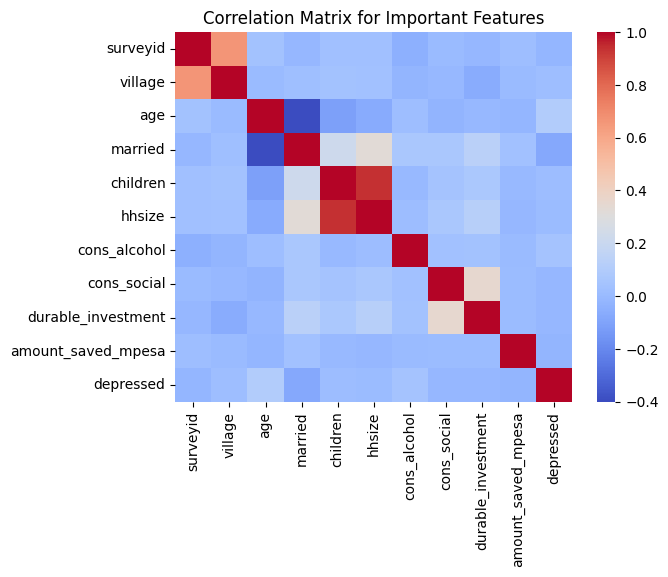

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Get the list of important columns
important_columns = ['cons_social', 'durable_investment', 'hhsize', 'children', 'married', 'amount_saved_mpesa', 'age', 'cons_alcohol', 'village', 'surveyid', 'depressed']

# Read the train CSV into a Pandas DataFrame
df = pd.read_csv('/content/drive/MyDrive/Busara Mental Health/train.csv', usecols=important_columns)

# Create a correlation matrix
correlation_matrix = df.corr()

# Create a heatmap using Seaborn
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False)

# Show the plot
plt.title("Correlation Matrix for Important Features")
plt.show()




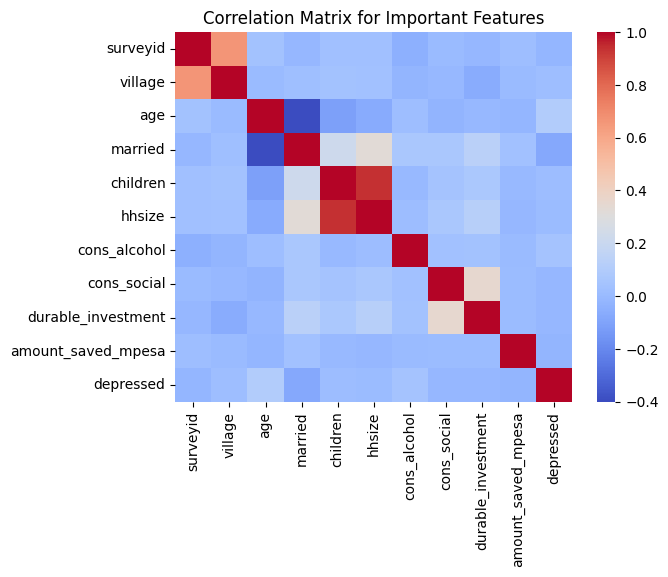

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns

# Get the list of important columns
important_columns = ['cons_social', 'durable_investment', 'hhsize', 'children', 'married', 'amount_saved_mpesa', 'age', 'cons_alcohol', 'village', 'surveyid', 'depressed']

# Read the train CSV into a Pandas DataFrame
df_train = pd.read_csv('/content/drive/MyDrive/Busara Mental Health/train.csv', usecols=important_columns)

# Create a correlation matrix
correlation_matrix = df_train.corr()

# Create a heatmap using Seaborn
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False)

# Show the plot without values within
plt.title("Correlation Matrix for Important Features")
plt.show()





In [17]:
import pandas as pd



# Get the list of important columns
important_columns = ['cons_social', 'durable_investment', 'hhsize', 'children', 'married', 'amount_saved_mpesa', 'cons_alcohol','depressed']

# Read the train and test data into Pandas DataFrames
df_train = pd.read_csv('/content/drive/MyDrive/Busara Mental Health/train.csv', usecols=important_columns)
df_test = pd.read_csv('/content/drive/MyDrive/Busara Mental Health/test.csv', usecols=important_columns)



# Handle NaN values
df_train.fillna(value=0, inplace=True)
df_test.fillna(value=0, inplace=True)

# Replace the string value with NaN
df_test['cons_alcohol'].replace('.d', np.NAN, inplace=True)



Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


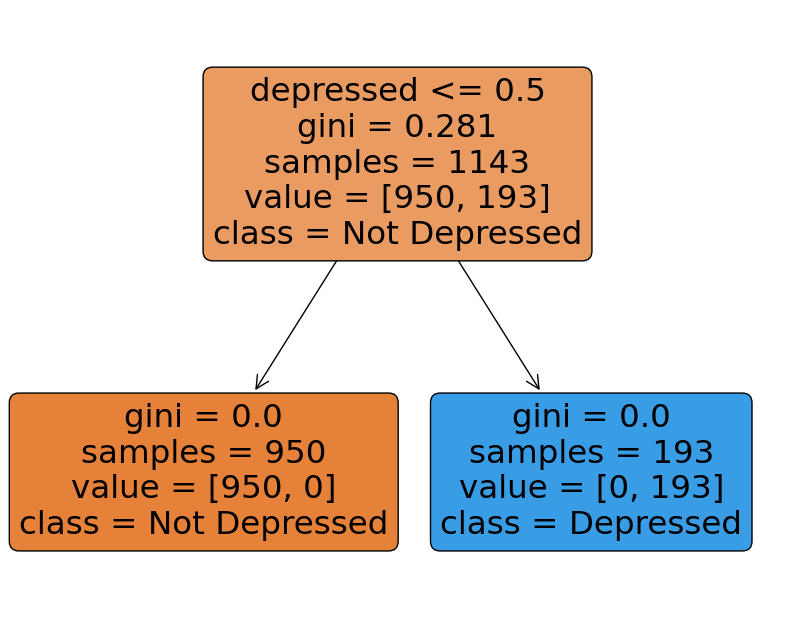

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import plot_tree


# Create the decision tree model
model = DecisionTreeClassifier()

# Train the model
model.fit(df_train, df_train['depressed'])

# Make predictions
dtc_pred = model.predict(df_test)

# Calculate the accuracy, precision, recall, and F1-score
accuracy = accuracy_score(df_test['depressed'], dtc_pred)
precision = precision_score(df_test['depressed'], dtc_pred)
recall = recall_score(df_test['depressed'], dtc_pred)
f1_score = f1_score(df_test['depressed'], dtc_pred)

# Print the metrics
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1_score)

# Plot the decision tree
plt.figure(figsize=(10, 8))
plot_tree(
    model,
    feature_names=df_train.columns,
    class_names=['Not Depressed', 'Depressed'],
    rounded=True,
    filled=True
)
plt.show()

Model 1:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


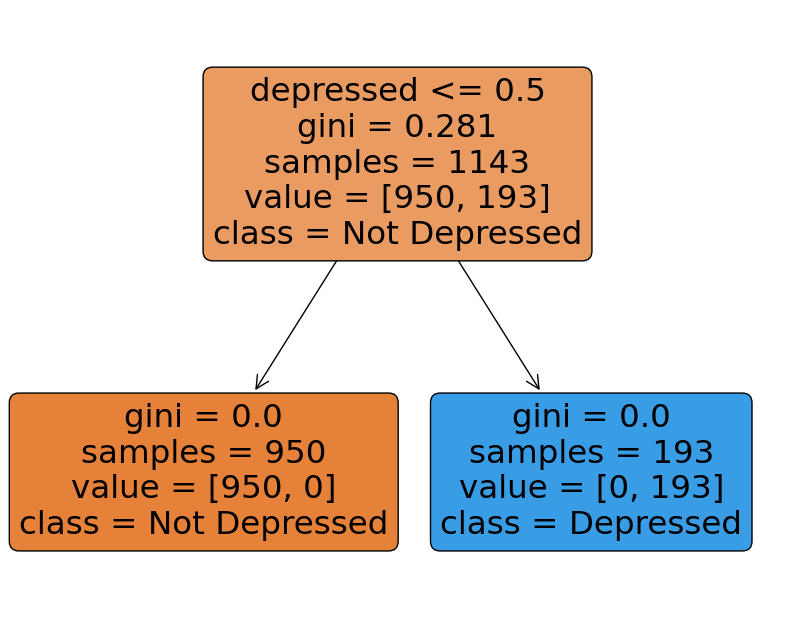

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create the decision tree model with custom hyperparameters
model1 = DecisionTreeClassifier(max_depth=10, min_samples_split=5, min_samples_leaf=2)

# Train the model
model1.fit(df_train, df_train['depressed'])

# Make predictions
dtc_pred1 = model1.predict(df_test)

# Calculate the accuracy, precision, recall, and F1-score
accuracy1 = accuracy_score(df_test['depressed'], dtc_pred1)
precision1 = precision_score(df_test['depressed'], dtc_pred1)
recall1 = recall_score(df_test['depressed'], dtc_pred1)

# Calculate the F1-score and assign it to a variable
f1_score1 = f1_score(df_test['depressed'], dtc_pred1)

# Print the metrics
print('Model 1:')
print('Accuracy:', accuracy1)
print('Precision:', precision1)
print('Recall:', recall1)
print('F1-score:', f1_score1)

# Plot the decision tree
plt.figure(figsize=(10, 8))
plot_tree(
    model1,
    feature_names=df_train.columns,
    class_names=['Not Depressed', 'Depressed'],
    rounded=True,
    filled=True
)
plt.show()


Model 2:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


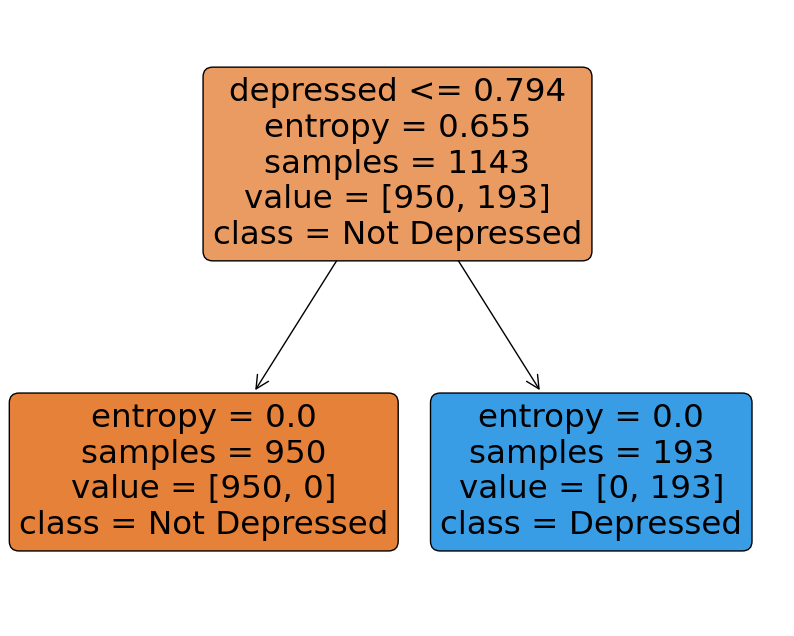

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create the decision tree model with custom hyperparameters
model2 = DecisionTreeClassifier(criterion='entropy', splitter='random', max_depth=15, min_samples_split=10, min_samples_leaf=5)

# Train the model
model2.fit(df_train, df_train['depressed'])

# Make predictions
dtc_pred2 = model2.predict(df_test)

# Calculate the accuracy, precision, recall, and F1-score
accuracy2 = accuracy_score(df_test['depressed'], dtc_pred2)
precision2 = precision_score(df_test['depressed'], dtc_pred2)
recall2 = recall_score(df_test['depressed'], dtc_pred2)

# Calculate the F1-score and assign it to a variable
f1_score2 = f1_score(df_test['depressed'], dtc_pred2)

# Print the metrics
print('Model 2:')
print('Accuracy:', accuracy2)
print('Precision:', precision2)
print('Recall:', recall2)
print('F1-score:', f1_score2)


# Plot the decision tree
plt.figure(figsize=(10, 8))
plot_tree(
    model2,
    feature_names=df_train.columns,
    class_names=['Not Depressed', 'Depressed'],
    rounded=True,
    filled=True
)
plt.show()


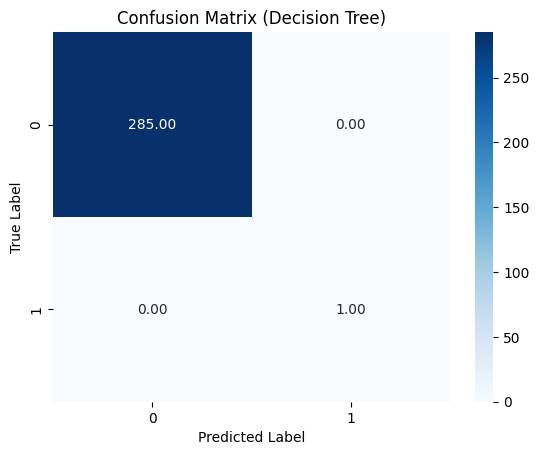

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm_dtc = confusion_matrix(df_test['depressed'], dtc_pred)

# Plot the confusion matrix
sns.heatmap(cm_dtc, annot=True, fmt='.2f', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Decision Tree)')
plt.show()


In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score



# Create the random forest classifier model
model = RandomForestClassifier()

# Train the model
model.fit(df_train, df_train['depressed'])

# Make predictions on the test data
rfc_pred = model.predict(df_test)

# Calculate the accuracy, precision, recall, and F1-score
accuracy = accuracy_score(df_test['depressed'], rfc_pred)
precision = precision_score(df_test['depressed'], rfc_pred)
recall = recall_score(df_test['depressed'], rfc_pred)
f1_score = f1_score(df_test['depressed'], rfc_pred)

# Print the metrics
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1_score)


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score



# Create the logistic regression model
model = LogisticRegression(max_iter=100000)

# Train the model
model.fit(df_train, df_train['depressed'])

# Make predictions on the test data
lr_pred = model.predict(df_test)

# Calculate the accuracy, precision, recall, and F1-score
accuracy = accuracy_score(df_test['depressed'], lr_pred)
precision = precision_score(df_test['depressed'], lr_pred)
recall = recall_score(df_test['depressed'], lr_pred)
f1_score = f1_score(df_test['depressed'], lr_pred)

# Print the metrics
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1_score)



Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


In [24]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Create the Naive Bayes model
model = GaussianNB()

# Train the model
model.fit(df_train, df_train['depressed'])

# Make predictions on the test data
GNB_pred = model.predict(df_test)

# Calculate the accuracy, precision, recall, and F1-score
accuracy = accuracy_score(df_test['depressed'], GNB_pred)
precision = precision_score(df_test['depressed'], GNB_pred)
recall = recall_score(df_test['depressed'], GNB_pred)
f1_score = f1_score(df_test['depressed'], GNB_pred)

# Print the metrics
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1_score)


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


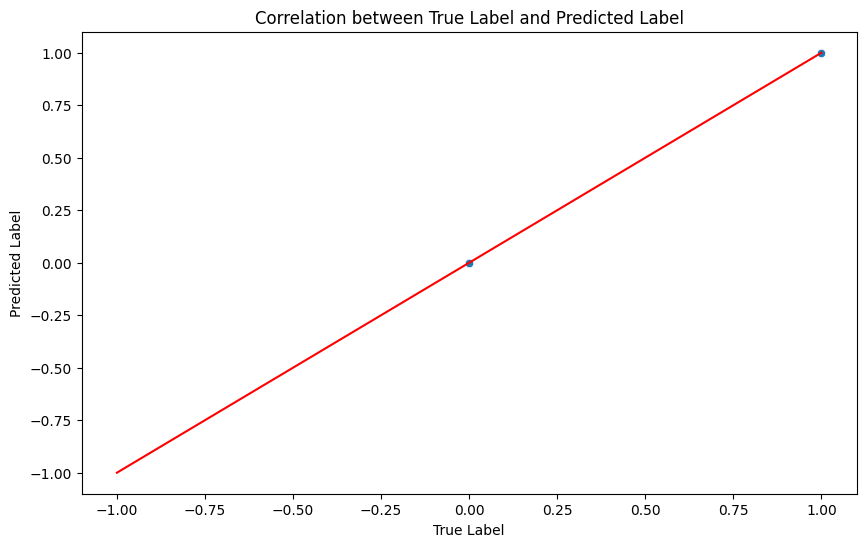

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot of the true labels vs. the predicted labels
df_test['rfc_pred'] = rfc_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='depressed',
    y='rfc_pred',
    data=df_test
)

# Add a line of best fit
plt.plot([-1, 1], [-1, 1], color='red')

# Add labels and title
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.title('Correlation between True Label and Predicted Label')
plt.show()


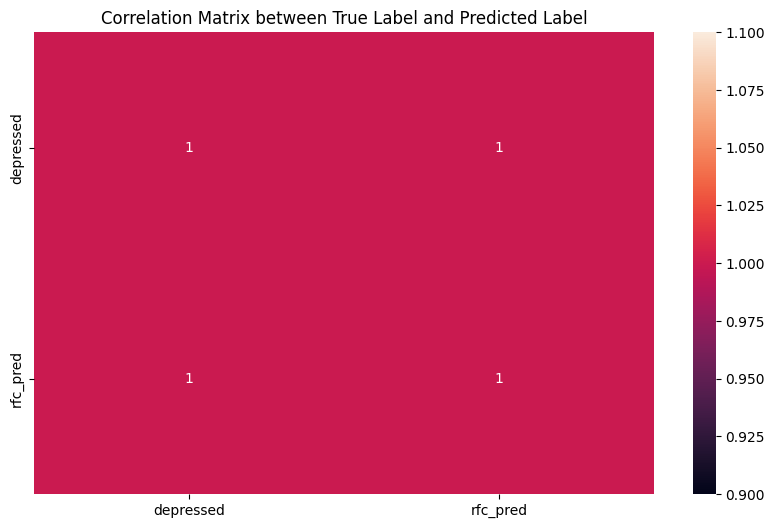

In [26]:
rfc_pred = model.predict(df_train)

# Create a Pandas dataframe that contains the true labels and the predicted labels
df_corr = pd.DataFrame({'depressed': df_train['depressed'], 'rfc_pred': rfc_pred})

# Calculate the correlation between the two variables and store the results in a NumPy array
corr = df_corr.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True)
plt.title('Correlation Matrix between True Label and Predicted Label')
plt.show()



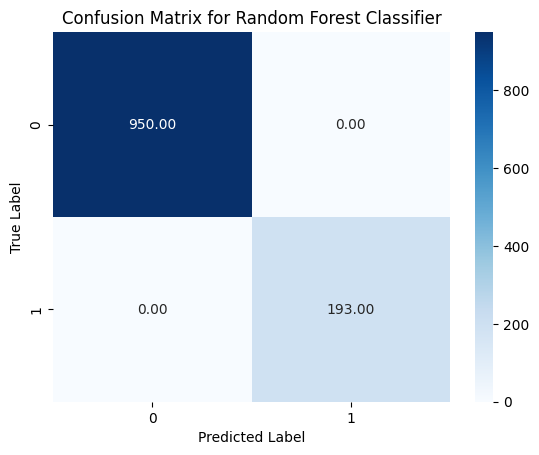

In [27]:
# Compute the confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(df_train['depressed'], rfc_pred)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='.2f', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

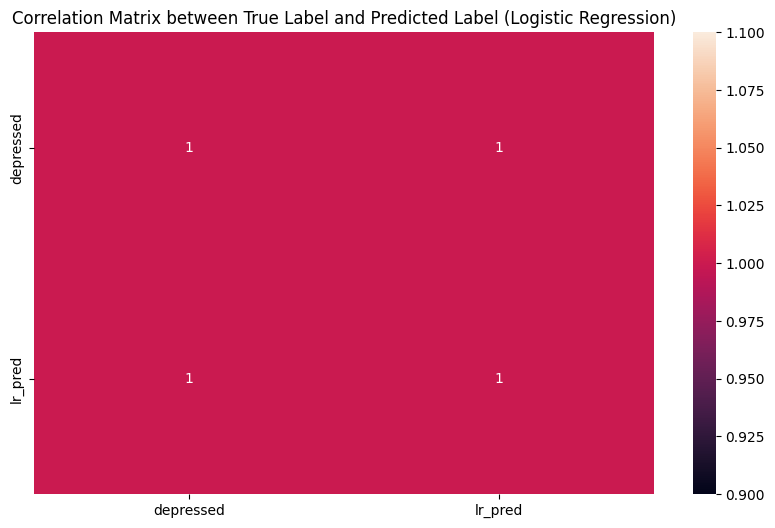

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a Pandas dataframe that contains the true labels and the predicted labels
df_corr_lr = pd.DataFrame({'depressed': df_test['depressed'], 'lr_pred': lr_pred})

# Calculate the correlation between the two variables and store the results in a NumPy array
corr_lr = df_corr_lr.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(corr_lr, annot=True)
plt.title('Correlation Matrix between True Label and Predicted Label (Logistic Regression)')
plt.show()


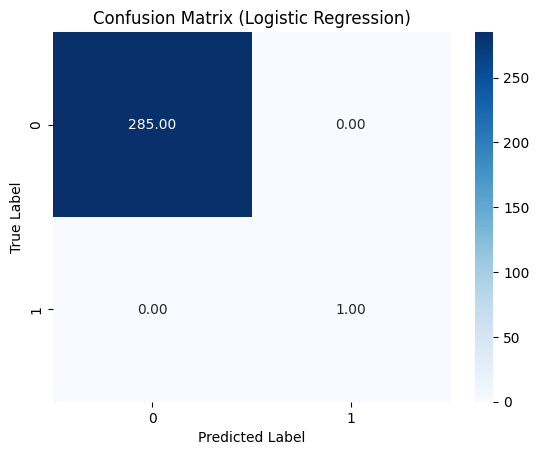

In [29]:
# Compute the confusion matrix
from sklearn.metrics import confusion_matrix

cm_lr = confusion_matrix(df_test['depressed'], lr_pred)

# Plot the confusion matrix
sns.heatmap(cm_lr, annot=True, fmt='.2f', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Logistic Regression)')
plt.show()


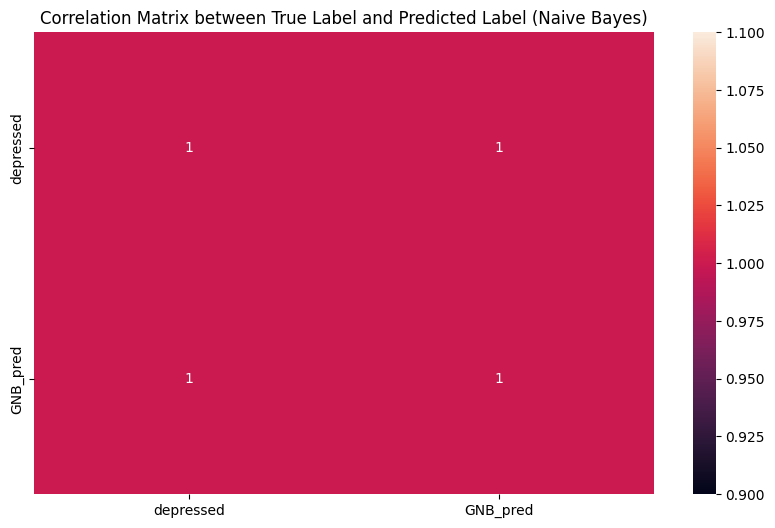

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a Pandas dataframe that contains the true labels and the predicted labels
df_corr_GNB = pd.DataFrame({'depressed': df_test['depressed'], 'GNB_pred': GNB_pred})

# Calculate the correlation between the two variables and store the results in a NumPy array
corr_GNB = df_corr_GNB.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(corr_GNB, annot=True)
plt.title('Correlation Matrix between True Label and Predicted Label (Naive Bayes)')
plt.show()


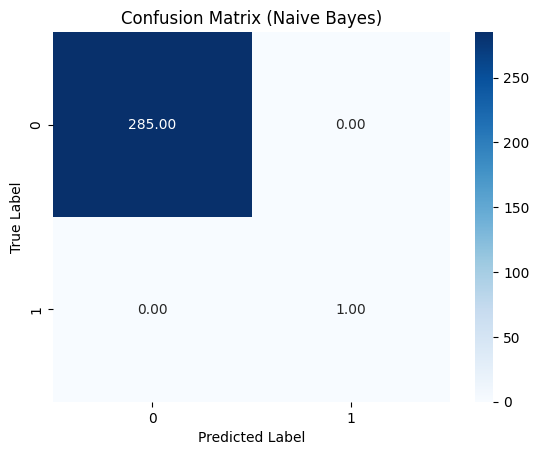

In [31]:
# Compute the confusion matrix
from sklearn.metrics import confusion_matrix

cm_GNB = confusion_matrix(df_test['depressed'], GNB_pred)

# Plot the confusion matrix
sns.heatmap(cm_GNB, annot=True, fmt='.2f', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Naive Bayes)')
plt.show()
